# Project: Classifying Wine Cultivars Using Logistic Regression Model and XGBOOST Model.
This project focuses on classifying wine cultivars based on their chemical constituents using two machine learning models: Logistic Regression and XGBoost. Both models are compared to assess their performance, enabling a better understanding of their strengths and weaknesses in handling this specific classification task.

### **Model Selection**
- **Logistic Regression**:
    Logistic Regression is a statistical technique used to analyze datasets where one or more independent variables lead to a result. Often employed for binary classification, Logistic Regression predicts the likelihood of an event occurring by fitting data to a logistic or sigmoid function (Mani et al., 2023). In Logistic Regression, three primary hyperparameters are vital:

        1) Solver: This specifies the algorithm used in the optimization problem. Options include {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, with the default being 'lbfgs'. 

        2)Penalty (Regularization): Intended to reduce model generalization error, the penalty discourages and regulates overfitting. Options for the penalty are {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, with the default being 'l2'.

        3)C (Regularization Strength): Collaborating with the penalty term, C helps control overfitting. Lower values indicate stronger regularization, while higher values instruct the model to give greater weight to the training data (Gusarov, 2022).

- **XGBoost**:
   XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that builds an ensemble of decision trees iteratively to optimize prediction accuracy. It uses gradient boosting with regularization techniques to prevent overfitting, making it highly effective for structured data in both classification and regression tasks.In XGBoost, five primary hyperparameters are vital:

        1) learning_rate: Controls the step size by which XGBoost updates model weights after each tree. Lower values make learning slower but often improve generalization, typically ranging from 0.01 to 0.3.

        2) max_depth: Sets the maximum depth of each decision tree, controlling how much complexity the model can capture. Larger values allow more complex patterns but may lead to overfitting.

        3) n_estimators: Determines the total number of decision trees in the ensemble. More trees improve accuracy but increase training time and risk overfitting if not paired with appropriate regularization.

        4) subsample: Specifies the fraction of training samples used to train each tree. Using values between 0.5 and 1.0 reduces overfitting by adding randomness during training.
        
        5) colsample_bytree: Indicates the fraction of features to consider for splitting at each tree node, typically between 0.5 and 1.0. It improves model robustness by introducing diversity among the trees.

   By including both models in this project, we aim to demonstrate the trade-offs between a simpler linear model (Logistic Regression) and a more advanced ensemble learning model (XGBoost).

### **Data Collection**
The dataset for this project is sourced from Kaggle. It contains **13 chemical features** of wines from Italy, such as alcohol content, acidity, magnesium levels, and other chemical properties, alongside their corresponding **cultivar types**. This dataset provides an excellent opportunity to evaluate and compare the performance of the Logistic Regression and XGBoost models in predicting wine types based on these chemical characteristics.

## I. Data Loading and Understanding

In [186]:
# Import libraries
from scipy.io import arff
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import warnings


# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

In [187]:
# Load the ARFF file
data, meta = arff.loadarff('dataset_191_wine.arff')

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows 
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [188]:
# Assess feature distributions, outliers, and scales
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [189]:
# Display DataFrame information, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    object 
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    float64
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

## II. Data Preprocessing
Data preprocessing is a vital step that ensures the accuracy, completeness, and relevance of data for analysis or machine learning models. These tasks involve several key processes: 
### II.1. Data Cleaning
Data cleaning involves addressing issues like missing data, duplicates, and outliers, which can impact analysis or model training.
#### II.1.1) Handling missing data

In [190]:
# Find missing data
df.isna().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

**<span style="color:blue;">Observations:</span>** The DataFrame df does not have any missing data. If there are missing values, you can fill them with the mean using df['column_name'].fillna(df['column_name'].mean(), inplace=True), or fill them with the median using df['column_name'].fillna(df['column_name'].median(), inplace=True), or drop the rows with null values using df.dropna().

#### II.1.2) Handling duplicated data

In [191]:
# Find duplicated data
df.duplicated().sum()

0

**<span style="color:blue;">Observations:</span>** The DataFrame df does not have any duplicated data; otherwise, drop the duplicated rows using df.drop_duplicates().

#### II.1.3) Handling outliers

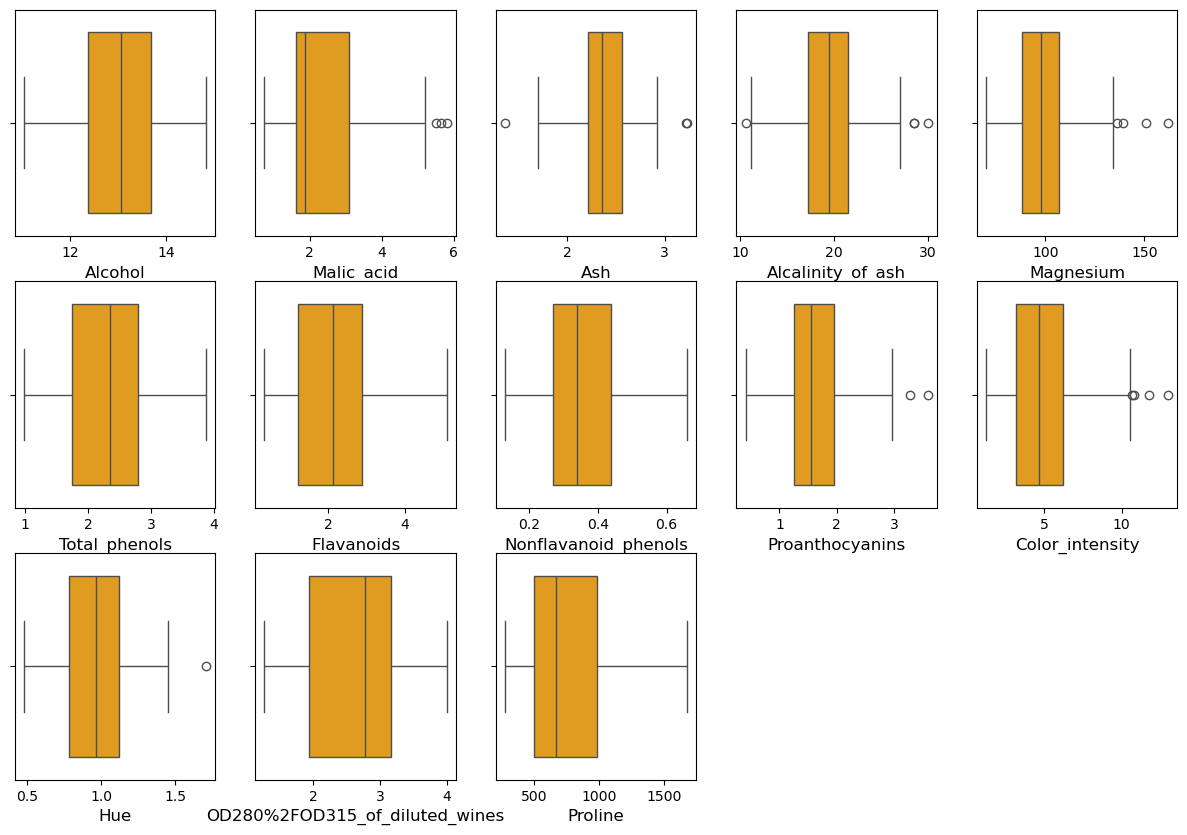

In [192]:
# Find the outliers using boxplot
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.iloc[:, 1:14]):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df.iloc[:, 1:14], x = col , color = "orange")
    plt.xlabel(col, fontsize = 12)
    plt.xticks(fontsize = 10)

**<span style="color:blue;">Observations:</span>** The boxplot displays some unusual data points, marked by the small circles, in 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', and 'Color_intensity'. These points are positioned more than 1.5 times the interquartile range (IQR) away from the quartiles, indicating they might be outliers.

In [193]:
# Function to remove outliers 
# Reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# Reference: https://www.youtube.com/watch?v=A3gClkblXK8
def removeOutliers(df):
    
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

# Remove outliers using function removeOutliers
df = removeOutliers(df)

# Check the updated df
df.shape

(161, 14)

#### II.1.4) Encoding categorical variables to numerical

In [194]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable (wine types)
df['class'] = label_encoder.fit_transform(df['class'].astype(str))

# Check the encoded 'class' column
print(df['class'].unique())


[0 1 2]


### II.2. Handling class imbalances
Class imbalances occur when the distribution of values for the class is not uniform, potentially leading to biased model performance. Techniques such as oversampling, undersampling, or adjusting class weights are commonly used to address this imbalance. For this project, the 'oversampling' technique will be employed due to the small dataset size (only 161 rows).

In [195]:
# Check if there is class imbalance issue 
df['class'].value_counts()

class
1    61
0    57
2    43
Name: count, dtype: int64

In [196]:
# Handling the class imbalance issue
# Reference: https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/
# Create an oversampler using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Create features (X_imbalance) and target variable (y_imbalance)
X_imbalance = df.drop(columns=['class'])
y_imbalance = df['class']

# Oversample the minority class
X_over, y_over = oversample.fit_resample(X_imbalance, y_imbalance)
print("Oversampled class distribution 1:", Counter(y_over))

# Oversample the minority class
X_over2, y_over2 = oversample.fit_resample(X_over, y_over)
print("Oversampled class distribution 2:", Counter(y_over2))

Oversampled class distribution 1: Counter({1: 61, 2: 61, 0: 57})
Oversampled class distribution 2: Counter({0: 61, 1: 61, 2: 61})


In [197]:
# Get features after Feature Selection
X = X_over2
y = y_over2

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train= np.asarray(X_train)
y_train= np.asarray(y_train)
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

# Print the size of training and test datasets
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 128 samples 
test set size: 55 samples


### II.3. Data Normalization:
Before building the model, it's essential to normalize the data since the unit of measurement might differ across features. This process ensures that all features contribute equally to the model. Here are the two steps involved:

- Step1: Visualize the distribution of each numerical column using a histogram to assess its normality. Look for a bell curve shape, which indicates a Gaussian distribution.

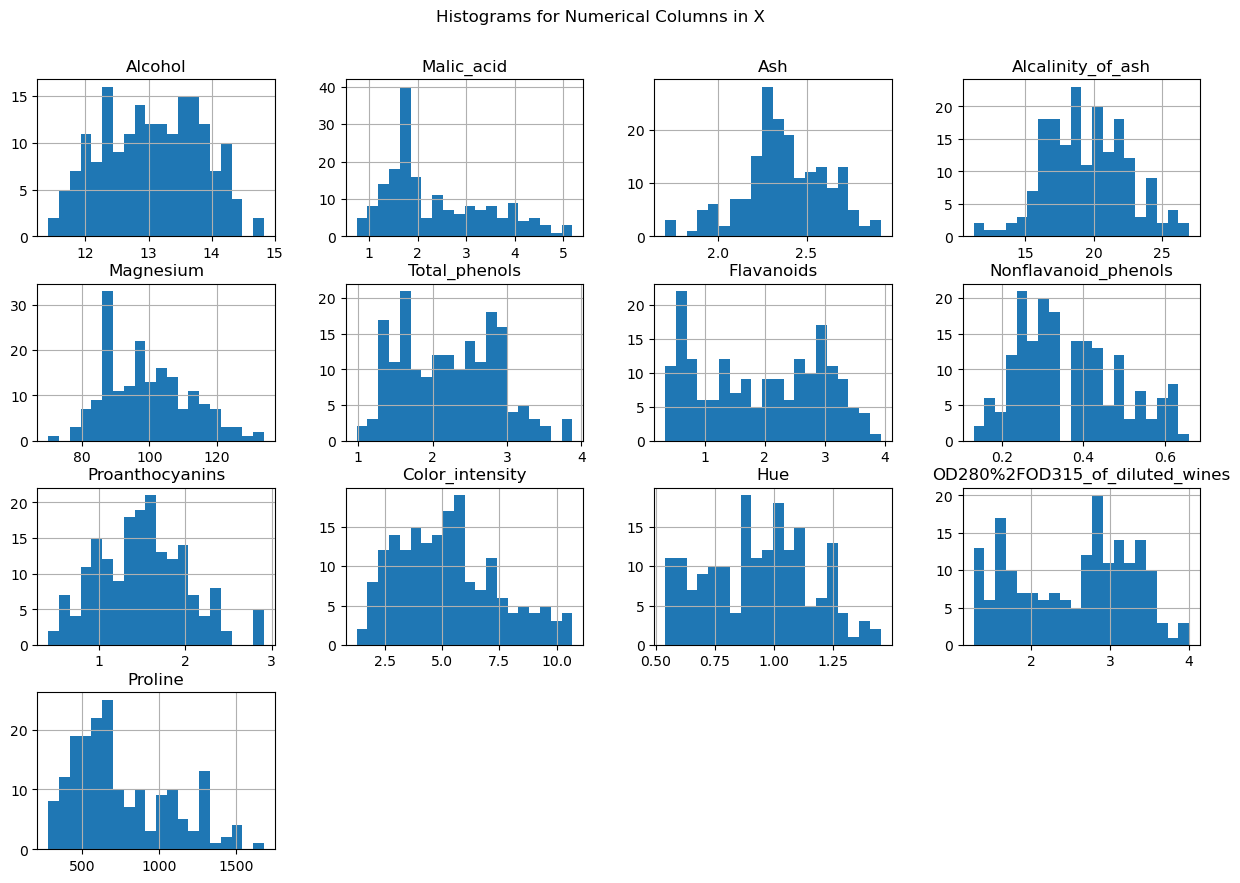

In [198]:
# Visualize the distribution of each numerical column in X
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

numeric_columns.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Columns in X', y=0.95)
plt.show()

- Step2 Normalize the features based on the observed distribution. Since all columes exhibit non-Gaussian distributions, Min-Max Normalization will be applied to these columns

In [199]:
# Normalize the dataset
scaler= MinMaxScaler().fit(X_train) # the scaler is fitted to the training set
normalized_X_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_X_test= scaler.transform(X_test) # the scaler is applied to the test set
print('X train before Normalization')
print(X_train[0:2])
print('\nX train after Normalization')
print(normalized_X_train[0:2])

X train before Normalization
[[1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.220e+01 3.030e+00 2.320e+00 1.900e+01 9.600e+01 1.250e+00 4.900e-01
  4.000e-01 7.300e-01 5.500e+00 6.600e-01 1.830e+00 5.100e+02]]

X train after Normalization
[[0.69298246 0.45393258 0.51282051 0.6835443  0.3125     0.07326007
  0.06069364 0.55102041 0.248      0.8982684  0.17582418 0.14391144
  0.2403709 ]
 [0.23099415 0.51460674 0.52991453 0.49367089 0.40625    0.03663004
  0.00578035 0.53061224 0.128      0.45670996 0.13186813 0.19926199
  0.16547789]]


## III.  Logistic Regression Model Building and Evaluation

### III.1. Logistic Regression Model - Model Building

In [200]:
# Build a Logistic Regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Train the Logistic Regression model on the normalized training data
logistic_model.fit(normalized_X_train, y_train)

# Evaluate the Logistic Regression model using cross-validation
logistic_scores = cross_val_score(logistic_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Logistic Regression Cross-Validation Accuracy Scores: {logistic_scores}")
print(f"Logistic Regression Mean Accuracy: {logistic_scores.mean():.4f}")


Logistic Regression Cross-Validation Accuracy Scores: [1.         0.96153846 1.         0.92       1.        ]
Logistic Regression Mean Accuracy: 0.9763


### III.2. Logistic Regression Model - Hyperparameter Tuning using Bayes Optimization

In [201]:
# Define the parameter search space
param_space_lr = {
    'C': (0.1, 10.0, 'log-uniform'),  # Regularization strength
    'solver': ['lbfgs', 'saga'],  # Solver options
    'max_iter': (10, 1000)  # Maximum number of iterations
}

# Perform Bayes Optimization for Logistic Regression
opt_lr = BayesSearchCV(logistic_model, param_space_lr, n_iter=32, cv=5, random_state=42)
opt_lr.fit(normalized_X_train, y_train)

# Display the best parameters found by Bayes Optimization
print("Best Hyperparameters for Logistic Regression: ", opt_lr.best_params_)


Best Hyperparameters for Logistic Regression:  OrderedDict([('C', 0.10168587136004645), ('max_iter', 820), ('solver', 'saga')])


### III.3. Logistic Regression Model - Model Validation using Cross-Validation

In [202]:
# Perform cross-validation with the best hyperparameters
best_logistic_model = opt_lr.best_estimator_
logistic_scores_best = cross_val_score(best_logistic_model, normalized_X_train, y_train, cv=5)

# Output the results
print(f"Logistic Regression Cross-Validation Accuracy Scores (with best params): {logistic_scores_best}")
print(f"Logistic Regression Mean Accuracy (with best params): {logistic_scores_best.mean():.4f}")


Logistic Regression Cross-Validation Accuracy Scores (with best params): [1.         0.96153846 1.         0.96       1.        ]
Logistic Regression Mean Accuracy (with best params): 0.9843


### III.4. Logistic Regression Model - Train the Model using Best Hyperparameters

In [203]:
# Train the model using the best hyperparameters
best_logistic_model.fit(normalized_X_train, y_train)


LogisticRegression(C=0.10168587136004645, max_iter=820,
                   multi_class='multinomial', random_state=42, solver='saga')

### III.5. Logistic Regression Model - Prediction and Final Metric Calculation

In [204]:
# Predict the test set results
y_pred_lr = best_logistic_model.predict(normalized_X_test)

# Calculate final accuracy, confusion matrix, and classification report
final_accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr, target_names=["Class 0", "Class 1", "Class 2"])

# Output results
print("Logistic Regression Final Accuracy: ", final_accuracy_lr)
print("Logistic Regression Confusion Matrix: \n", conf_matrix_lr)
print("Logistic Regression Classification Report: \n", classification_report_lr)


Logistic Regression Final Accuracy:  0.9818181818181818
Logistic Regression Confusion Matrix: 
 [[20  0  0]
 [ 0 17  1]
 [ 0  0 17]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      0.94      0.97        18
     Class 2       0.94      1.00      0.97        17

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



## IV. XGBoost Model Building and Evaluation

### IV.1. XGBoost Model Building

In [205]:
# Build an XGBoost Model
xgboost_model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)

# Train the model on the normalized training data
xgboost_model.fit(normalized_X_train, y_train)

# Evaluate the model using cross-validation with accuracy as the scoring metric
xgboost_scores = cross_val_score(xgboost_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Cross-Validation Accuracy Scores: {xgboost_scores}")
print(f"Mean Accuracy: {xgboost_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.96153846 0.96153846 1.         0.96       1.        ]
Mean Accuracy: 0.9766


### IV.2. XGBoost Model - Hyperparameter Tuning using Bayes Optimization

In [206]:
# Define the parameter search space
param_space_xgb = {
    'learning_rate': (0.01, 1, 'uniform'),
    'max_depth': (5, 10),
    'n_estimators': (50, 500),
    'subsample': (0.1, 1.0),
    'colsample_bytree': (0.1, 1.0)
}

# Perform Bayes Optimization
opt_xgb = BayesSearchCV(xgboost_model, param_space_xgb, n_iter=32, cv=5, random_state=42)
opt_xgb.fit(normalized_X_train, y_train)

# Display the best parameters found by Bayes Optimization
print("Best Hyperparameters found: ", opt_xgb.best_params_)


Best Hyperparameters found:  OrderedDict([('colsample_bytree', 0.5890627609212813), ('learning_rate', 0.9208091341729433), ('max_depth', 7), ('n_estimators', 427), ('subsample', 0.3916539840559363)])


### IV.3. XGBoost Model - Model Validation using Cross-Validation
Validate the model using cross-validation with the best hyperparameters from Bayes Optimization:

In [207]:
# Perform cross-validation with the best hyperparameters
best_xgb_model = opt_xgb.best_estimator_
xgboost_scores_best = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5)

# Output the results
print(f"Cross-Validation Accuracy Scores: {xgboost_scores_best}")
print(f"Mean Accuracy: {xgboost_scores_best.mean():.4f}")

Cross-Validation Accuracy Scores: [1.         0.96153846 1.         1.         1.        ]
Mean Accuracy: 0.9923


### IV.4. XGBoost Model - Train the Model using Best Hyperparameters

In [208]:
# Train the model using the best hyperparameters
best_xgb_model.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5890627609212813, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9208091341729433,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=427, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

### IV.5. XGBoost Model - Prediction and Final Metric Calculation
Predict on the test set and calculate the final metrics:

In [209]:
# Predict the test set results
y_pred_xgb = best_xgb_model.predict(normalized_X_test)

# Calculate final accuracy, confusion matrix, and classification report
final_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Class 0", "Class 1", "Class 2"])

# Output results
print("XGBoost Final Accuracy: ", final_accuracy_xgb)
print("XGBoost Confusion Matrix: \n", conf_matrix_xgb)
print("XGBoost Classification Report: \n", classification_report_xgb)


XGBoost Final Accuracy:  0.9636363636363636
XGBoost Confusion Matrix: 
 [[20  0  0]
 [ 0 16  2]
 [ 0  0 17]]
XGBoost Classification Report: 
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      0.89      0.94        18
     Class 2       0.89      1.00      0.94        17

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.97      0.96      0.96        55



## V. Logistic Regression Model and XGBoost Model Comparison

When comparing the Logistic Regression and XGBoost models, both performed well, but with notable differences. 

_**Performance Metrics**_: 
Logistic Regression achieved a higher final accuracy of 98.18% compared to XGBoost's 96.36%. It also demonstrated balanced performance across classes, with slightly better recall and F1-scores for Class 1 (0.94 vs. 0.89) and Class 2 (0.97 vs. 0.94). XGBoost maintained perfect precision for Class 0 and Class 1 but had minor misclassifications for Class 1 and Class 2, affecting its overall scores. 

_**Model Complexity and Training Time**_: 
Logistic Regression is computationally simpler, faster to train, and interpretable, making it an excellent choice for smaller datasets or straightforward problems. In contrast, XGBoost is more complex, requiring longer training times but generally excelling in handling large datasets and capturing complex relationships. 

_**Strengths and Weaknesses**_: 
Logistic Regression's simplicity is a strength, but it may struggle with non-linear relationships, while XGBoost's ability to model non-linearity and interactions is advantageous. However, XGBoost's complexity can lead to overfitting if not properly tuned and is less interpretable compared to Logistic Regression.



## VI. Reference

Barátossy, G., Berinkeiné Donkó, M., Csikorné Vásárhelyi, H., Héberger, K., & Rácz, A. (2020). Comprehensive Classification and Regression Modeling of Wine Samples Using 1 H NMR Spectra. Foods, 10(1). https://doi.org/10.3390/foods10010064

Gusarov, M. (2022, April 9). Do I need to tune logistic regression hyperparameters? CodeX. https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

Weinberger, K. (n.d.). *How to train a neural network (Stochastic Gradient Descent (SGD))*. YouTube. https://www.youtube.com/watch?v=zmu9wR2c7Z4&t=1222s

Visually Explained. (n.d.). *Importance of using SGD – Stochastic Gradient Descent*. YouTube. https://www.youtube.com/watch?v=UmathvAKj80&t=60s

StatQuest with Josh Starmer. (n.d.). *Regression Trees, Clearly Explained!!!*. YouTube. https://www.youtube.com/watch?v=g9c66TUylZ4

StatQuest with Josh Starmer. (n.d.). *Gradient Boost Part 1 (of 4): Regression Main Ideas*. YouTube. https://www.youtube.com/watch?v=3CC4N4z3GJc&t=810s

StatQuest with Josh Starmer. (n.d.). *Gradient Boost Part 2 (of 4): Regression Details*. YouTube. https://www.youtube.com/watch?v=2xudPOBz-vs

StatQuest with Josh Starmer. (n.d.). *XGBoost Part 1 (of 4): Regression*. YouTube. https://www.youtube.com/watch?v=OtD8wVaFm6E 